In [13]:
# Import required libraries
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

In [49]:
# Load the data
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


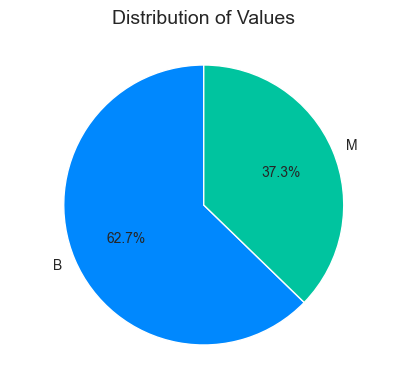

In [33]:
counts = df["diagnosis"].value_counts()

plt.figure(figsize=(5, 4))
plt.pie(counts.values, 
        labels=counts.index,
        autopct='%1.1f%%',
        colors=['#0088FE', '#00C49F'],
        startangle=90)
plt.title('Distribution of Values', pad=20, size=14)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [50]:
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

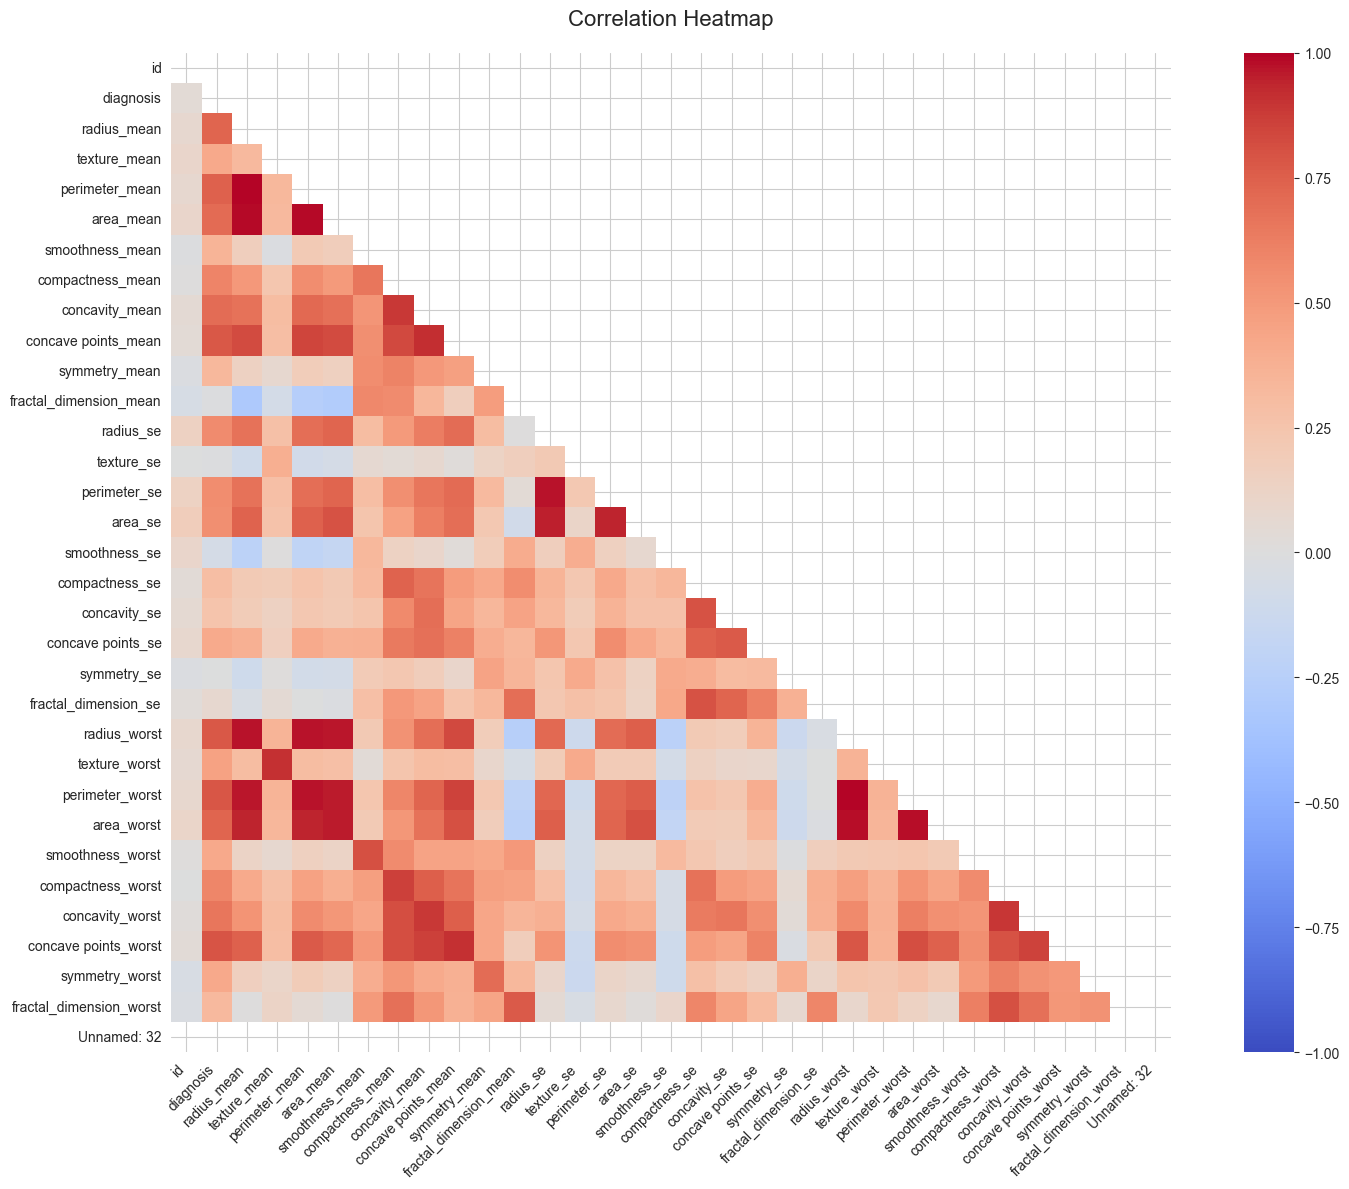

In [51]:
# Create figure
plt.figure(figsize=(16, 12))

# Create mask for upper triangle (optional, makes it less cluttered)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Create heatmap
sns.heatmap(df.corr(), 
           annot=False,  # Remove numbers
           cmap='coolwarm',  # Color scheme
           center=0,  # Center the colormap at 0
           square=True,  # Make cells square
           mask=mask,  # Apply mask
           vmin=-1, vmax=1)  # Fix the range of correlation values

plt.title('Correlation Heatmap', pad=20, size=16)
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
# Adjust layout
plt.tight_layout()
plt.show()

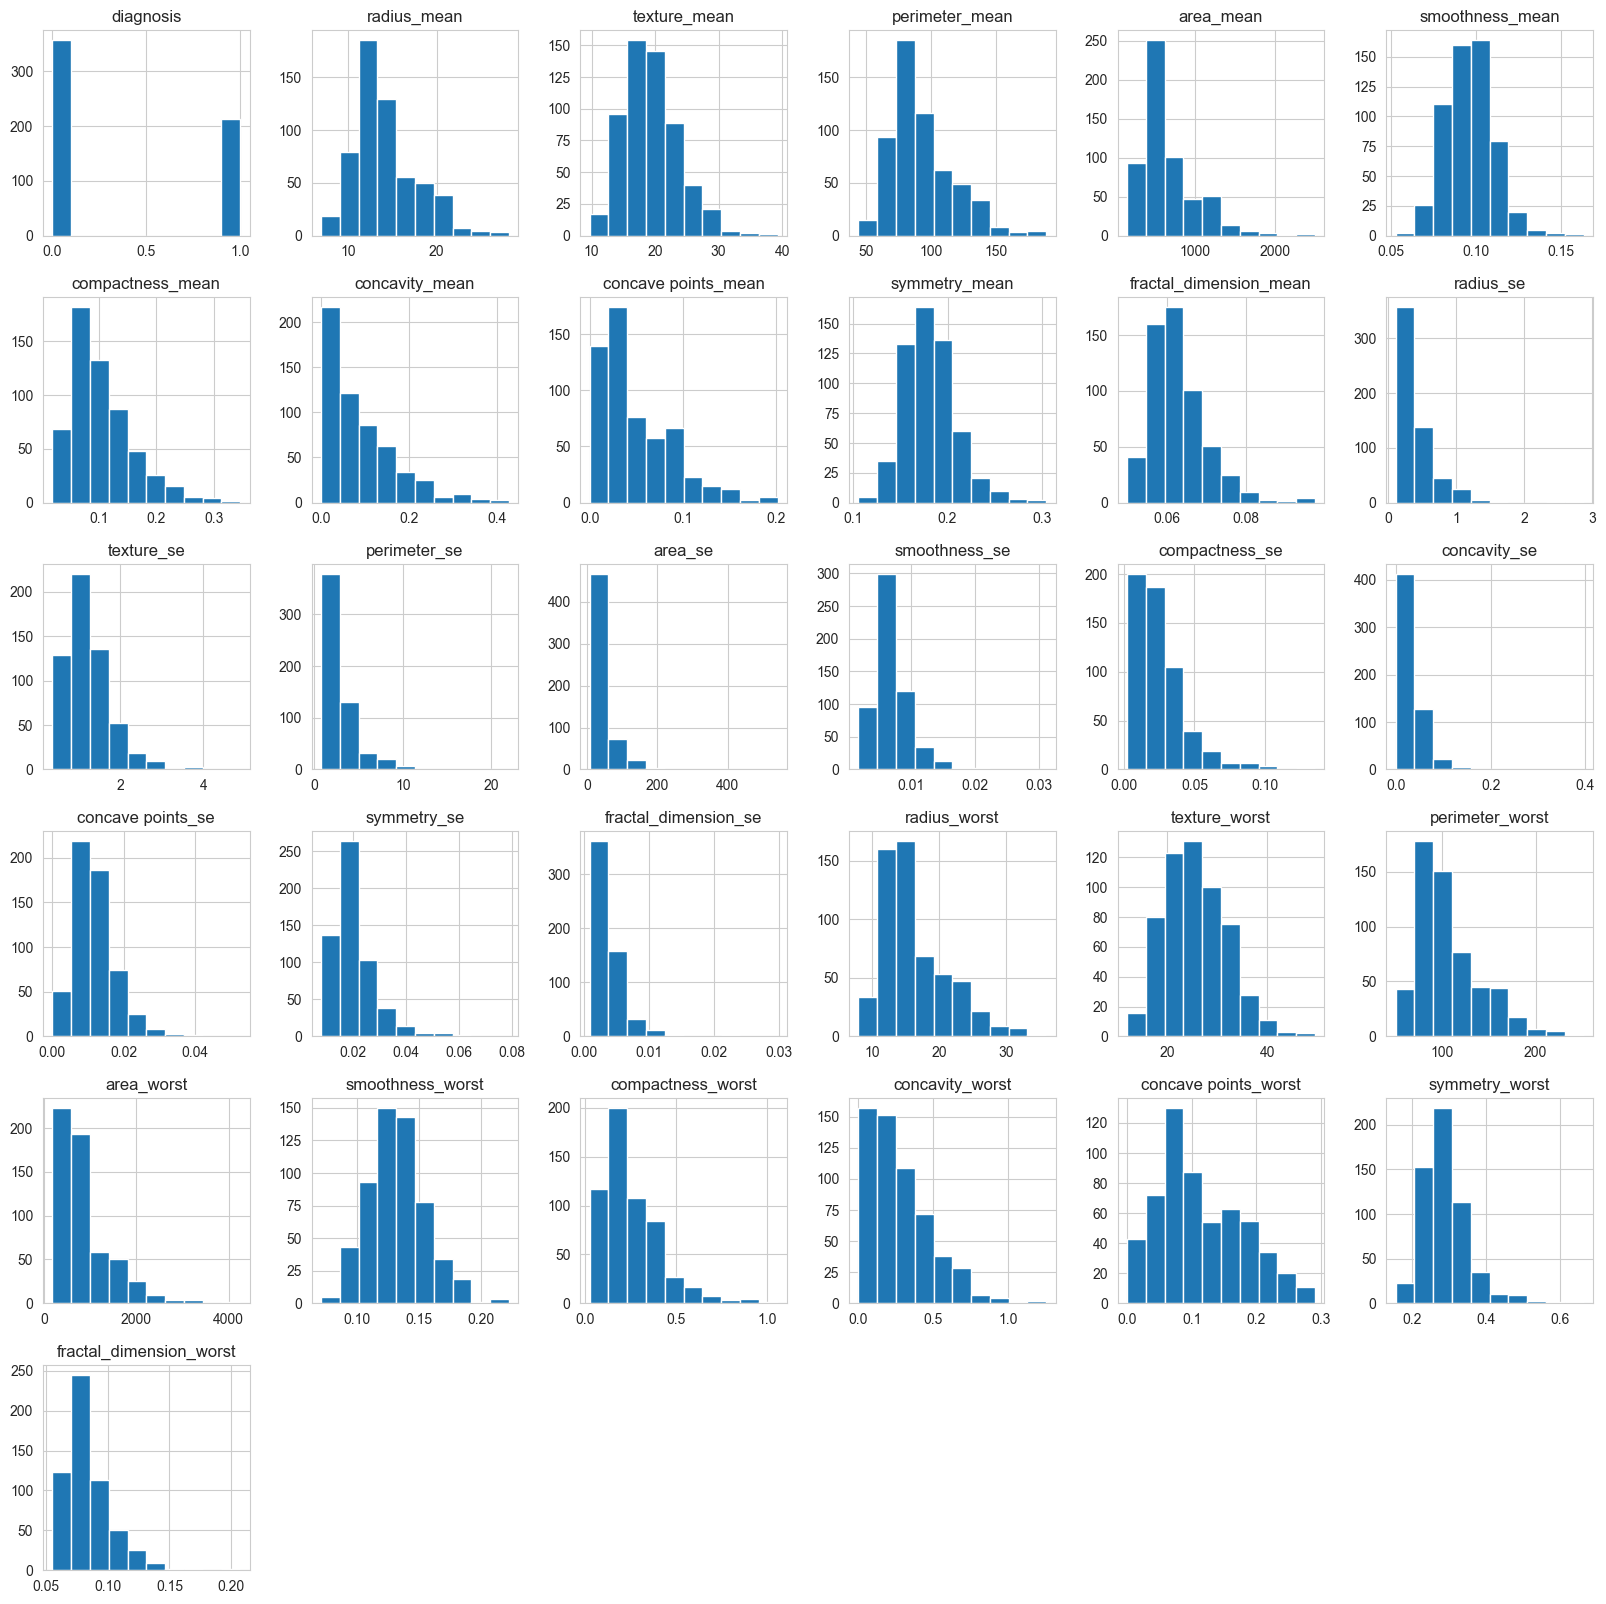

In [57]:
df_no_id = df.drop(["id", "Unnamed: 32"], axis=1)
df_no_id.hist(figsize=(20, 20));